<a href="https://colab.research.google.com/github/EddyGiusepe/Sistema_RECOMENDACION_Netflix/blob/main/Netflix_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>**Sistema de recomendação de filmes na Netflix com Python**</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

## 1. Importamos as nossas bibliotecas 

In [1]:
import numpy as np # Algebra linear
import pandas as pd # Para processar nossos Dados
import matplotlib.pyplot as plt
%matplotlib inline

import time
import seaborn as sns
import re
import math



## 2. Carregamos nossos Dados 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/4_teoria_IA_ML_DL_Eddy/Sistema_recomendacion_Netflix/netflix_titles.csv")

In [3]:
df.shape

(7787, 12)

In [11]:
df.sample(60)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7355,s7356,TV Show,Unorthodox,NaN,"Shira Haas, Amit Rahav, Jeff Wilbusch, Alex Re...",Germany,"March 26, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas",A Hasidic Jewish woman in Brooklyn flees to Be...
6957,s6958,TV Show,The Ultimatum,NaN,"Zoe Tay, Fann Wong, Li Nanxing, Tay Ping Hui, ...",Singapore,"July 1, 2017",2009,TV-14,1 Season,"International TV Shows, TV Dramas",Love and intrigue swirl around two women – one...
5717,s5718,TV Show,Song Exploder,NaN,Hrishikesh Hirway,United States,"December 15, 2020",2020,TV-MA,2 Seasons,Docuseries,Get inspired as musicians dig deep into the cr...
1556,s1557,Movie,Curtiz,Tamas Yvan Topolanszky,"Ferenc Lengyel, Evelin Dobos, Declan Hannigan,...",Hungary,"March 25, 2020",2018,TV-MA,99 min,"Dramas, International Movies","Driven and arrogant, film director Michael Cur..."
3430,s3431,Movie,Kocan Kadar Konus 2: Dirilis,Kıvanç Baruönü,"Ezgi Mola, Murat Yıldırım, Gülenay Kalkan, Nev...",Turkey,"March 10, 2017",2016,TV-14,104 min,"Comedies, International Movies, Romantic Movies","Efsun has found Mr. Right in Sinan, and their ..."
5243,s5244,Movie,Rocko's Modern Life: Static Cling,"Joe Murray, Cosmo Segurson","Carlos Alazraqui, Tom Kenny, Charlie Adler, Ji...",United States,"August 9, 2019",2019,TV-Y7,46 min,"Children & Family Movies, Comedies, LGBTQ Movies","After 20 years in space, Rocko struggles to ad..."
6463,s6464,Movie,The House Next Door,Milind Rau,"Siddharth, Andrea Jeremiah, Anisha Victor, Atu...",India,"January 9, 2018",2017,TV-MA,135 min,"Horror Movies, International Movies, Thrillers","In this Hindi version of ""Aval,"" a young coupl..."
1185,s1186,Movie,Camarón: The Film,Alexis Morante,Juan Diego,Spain,"July 18, 2018",2018,TV-14,105 min,"Documentaries, International Movies, Music & M...",This documentary looks back on the life of leg...
6428,s6429,Movie,The Guernsey Literary and Potato Peel Pie Society,Mike Newell,"Lily James, Michiel Huisman, Penelope Wilton, ...","United Kingdom, France, United States","August 10, 2018",2018,TV-PG,124 min,"Dramas, Romantic Movies",A London writer bonds with the colorful reside...
1487,s1488,TV Show,Conspiracy,NaN,Mark Bazeley,United Kingdom,"September 1, 2016",2015,TV-14,1 Season,"British TV Shows, Docuseries",Skeptics and others discuss widely held conspi...


## 3. Análise, limpeza e exploração de nossos Dados

In [5]:
# Aqui só a coluna "release_year" é do tipo inteiro

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Aqui ver a quantidade total de valores MISSING
# As colunas: director, cast, country, date_added e rating apresentam valores Missing. 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Outra maneira de visualizar os valores MISSING é:

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

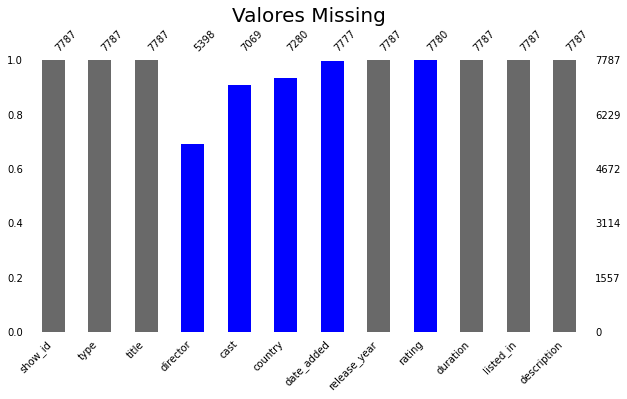

In [8]:
# Aqui vamos a usar o seguinte método para visualizar os Dados MISSING
# As colunas "director" e "cast" podem ser eliminadas, já que não podem ser completadas aleatoriamente (obvio: valores muitos versáteis)
# Para um número mínimo de valores Missing nas colunas "country", "date_added" e "rating", podemos completar eles usando a MODA ou a MÉDIA.

import missingno 

color = ["dimgrey","dimgrey","dimgrey","blue","blue","blue","blue","dimgrey","blue","dimgrey","dimgrey","dimgrey"]
missingno.bar(df, fontsize=10, color=color, figsize=(10, 5))
plt.title("Valores Missing", fontsize=20)
plt.show()


In [13]:
# Ideia na coluna "country"

df["country"].value_counts()

United States                                        2555
India                                                 923
United Kingdom                                        397
Japan                                                 226
South Korea                                           183
                                                     ... 
China, South Korea, United States                       1
South Korea, China, United States                       1
Pakistan, Norway, United States                         1
Ireland, Canada, United Kingdom, United States          1
Denmark, Germany, Belgium, United Kingdom, France       1
Name: country, Length: 681, dtype: int64

In [20]:
# Facilmente podemos observar que o valor mais comum é: "United States". 
# É a moda!

df["country"].mode()[0]

'United States'

In [21]:
# Ideia na coluna "rating"

df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [22]:
df["rating"].mode()[0]

'TV-MA'

In [23]:
# Aqui vamos a tratar os campos mencioandos acima

df["country"] = df["country"].fillna(df["country"].mode()[0])
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0]) 
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])


In [24]:
# Aqui, novamente, visualizamos a quantidade total de valores MISSING 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [25]:
# A seguir ELIMINAMOS as colunas: "cast" e "director" (os motivos foi explicado acima)

df = df.dropna(how="any", subset=["cast", "director"])


In [26]:
# Mais uma vez visualizamos nossos Dados

df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64